In [1]:
import shap
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# salinity only, sine forcing 
input_data = np.load('data/input_sal_temp_sine.npy')
output_data = np.load('data/output_sal_temp_sine.npy')

In [3]:
X_train, X_rem, y_train, y_rem = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_,scaler.scale_

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
input_scaled = scaler.transform(input_data)

Y_train = keras.utils.to_categorical(y_train)
Y_val = keras.utils.to_categorical(y_val)
Y_test = keras.utils.to_categorical(y_test)

In [5]:
X_train100 = shap.sample(X_train_scaled, 100)
X_val100 = shap.sample(X_val_scaled, 100)
shap_values_list = []

In [7]:
for i in range(10):
    
    print(i)
    
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.load_weights('models/stommel_model_ts_sine_'+str(i)+'.h5')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    explainer = shap.KernelExplainer(model.predict, X_train100, feature_names=['time', 'salinity', 'temperature', 'forcing'])
    shap_values = explainer.shap_values(X_val100)
    shap_values_list.append(shap_values)    

0
4/4 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


94/94 [==============================] - 0s 691us/step
1
4/4 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

94/94 [==============================] - 0s 622us/step


94/94 [==============================] - 0s 1ms/step
2
4/4 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


94/94 [==============================] - 0s 615us/step
3
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


94/94 [==============================] - 0s 642us/step
4
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


94/94 [==============================] - 0s 679us/step
5
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


94/94 [==============================] - 0s 879us/step
6
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


94/94 [==============================] - 0s 645us/step
7
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


94/94 [==============================] - 0s 650us/step
8
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


94/94 [==============================] - 0s 673us/step
9
4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


94/94 [==============================] - 0s 641us/step


In [8]:
shap_values_list_np = np.array(shap_values_list)

In [9]:
shap_values_list_np.shape

(10, 2, 100, 5)

In [10]:
shap_values_mean = np.mean(shap_values_list_np, axis=0)

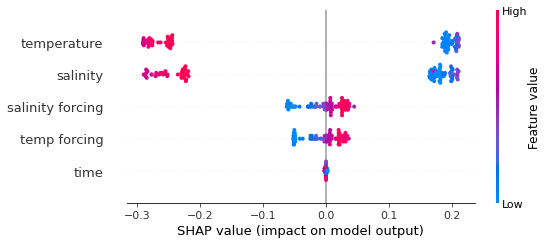

In [12]:
shap.summary_plot(shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

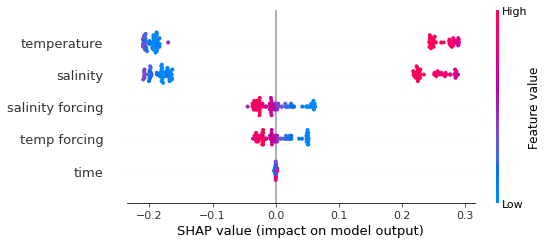

In [13]:
shap.summary_plot(shap_values_mean[0], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

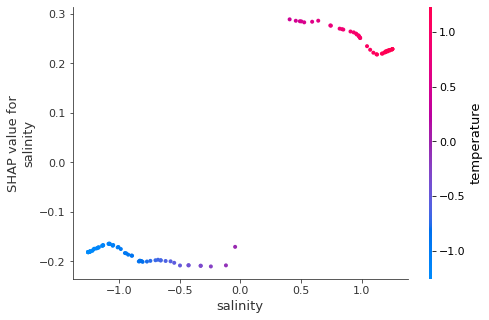

In [14]:
shap.dependence_plot(1, shap_values_mean[0], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

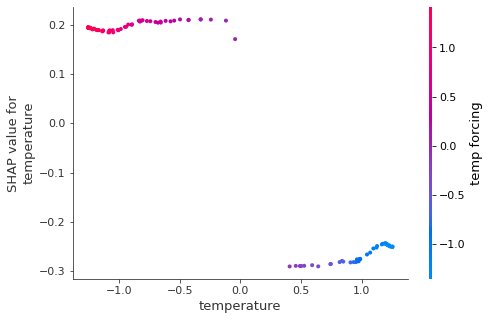

In [16]:
shap.dependence_plot(2, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

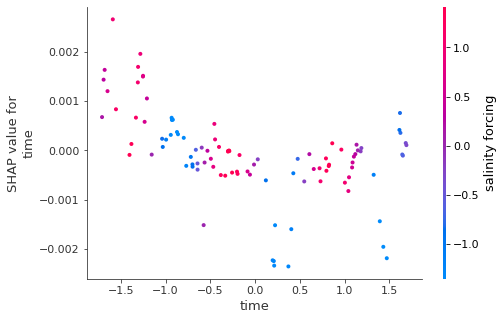

In [20]:
shap.dependence_plot(0, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

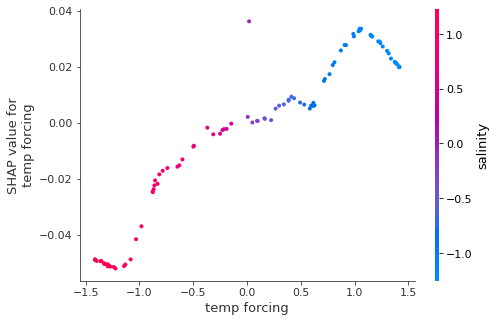

In [22]:
shap.dependence_plot(4, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

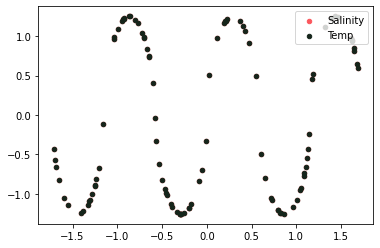

In [24]:
plt.scatter(X_val100[:, 0], X_val100[:, 1], label='Salinity', s=20, color = '#FB575D');
plt.scatter(X_val100[:, 0], X_val100[:, 2], label='Temp', s=20, color = '#15251B');
plt.legend(loc='upper right');

In [ ]:
transformed_X = scaler.inverse_transform(X_val100)
qvals = []
alpha=0.2; 
beta=0.8; 
k=10e9
for x in transformed_X: 
    DeltaT = x[2]
    DeltaS = x[1]
    qvals.append(-k*(-alpha*DeltaT + beta*DeltaS))

In [110]:
def get_q_color(DeltaT, DeltaS):
    q = -k*(-alpha*DeltaT + beta*DeltaS)
    if q < 0:
        return 'r'
    else:
        return 'b'

In [88]:
shap_values_mean[1][:, ].shape

(100, 4)

In [90]:
plt.scatter(X_val100[:, 2], shap_values_mean[1][:, 2], color=get_q_color(X_val100[:, 2], X_val100[:, 1]))a

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

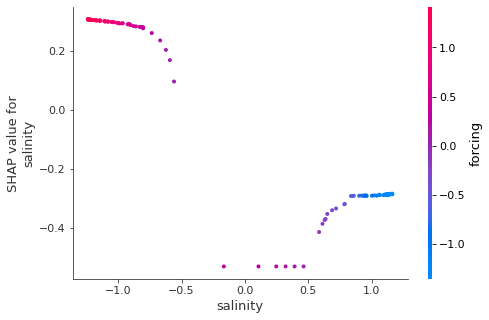

In [98]:
shap.dependence_plot(1, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'forcing'])

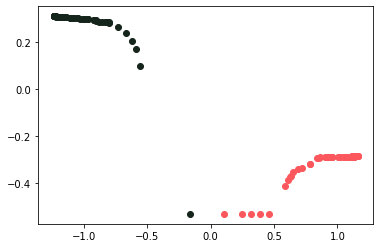

In [106]:
for i in range(100):
    plt.scatter(X_val100[:, 1][i], shap_values_mean[1][:, 1][i], color=get_q_color(X_val100[:, 2][i], X_val100[:, 1][i]))

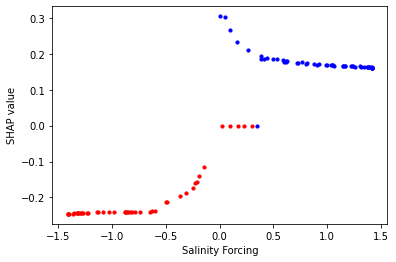

In [116]:
# blue positive q, red negative q
for i in range(100):
    plt.scatter(X_val100[:, 3][i], shap_values_mean[1][:, 3][i], color=get_q_color(X_val100[:, 2][i], X_val100[:, 1][i]), s=10)
plt.xlabel('Salinity Forcing');
plt.ylabel('SHAP value');